In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## Path 
Chemin au dossier de la simulation

In [2]:
path = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR_Reference"

## Temps d'exécutions (ms)

In [3]:
temps = pd.read_csv(path + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init   Run  Mesures  Close  Total
0     9  5618        0      0   5628


## Contaminations au fil du temps

<function matplotlib.pyplot.show(close=None, block=None)>

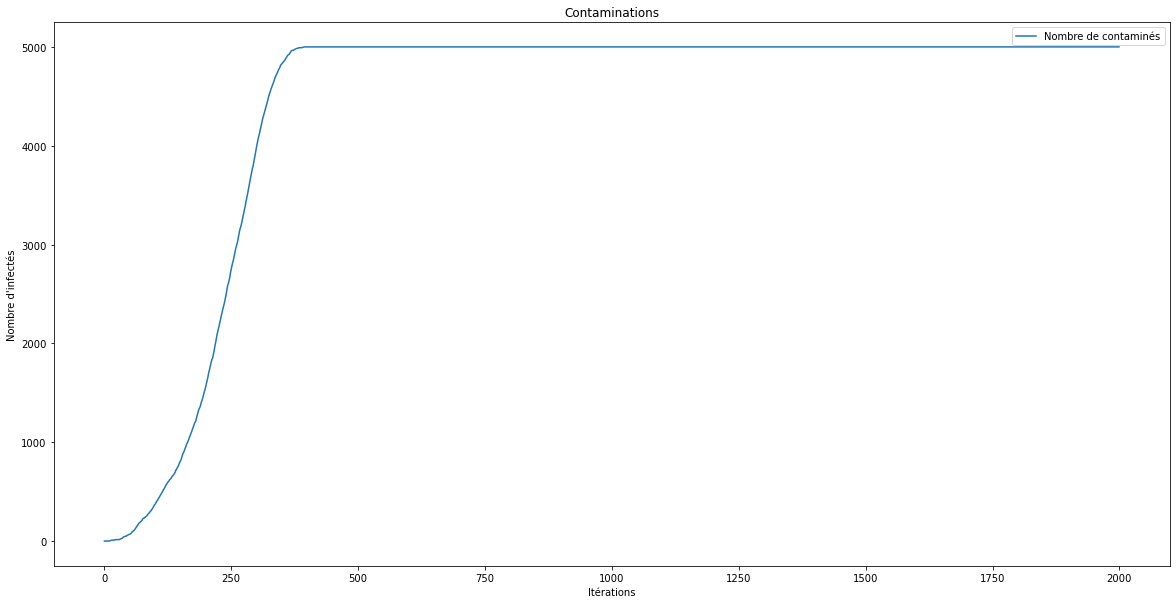

In [4]:
contamine = pd.read_csv(path + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine.plot(figsize=(20, 10))
plt.title("Contaminations")
plt.xlabel("Itérations")
plt.ylabel("Nombre d'infectés")
plt.show

## Contaminations au fil du temps : SI

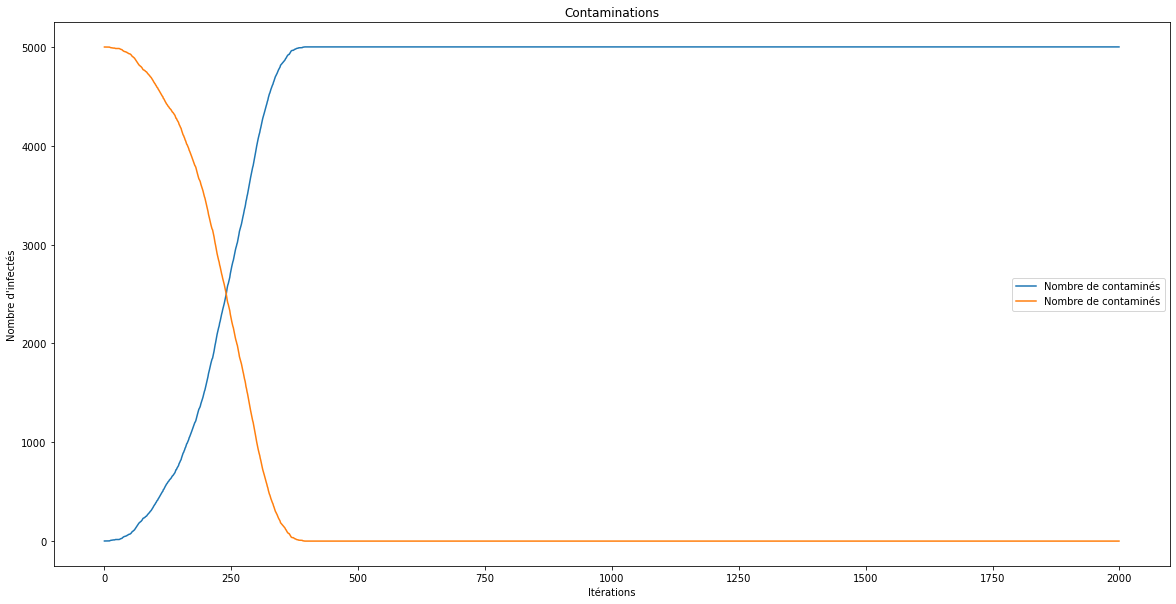

In [5]:
nombre_individus = 5000

contamine = pd.read_csv(path + "/data_csv/m_nombre_contamine.csv", dtype=int)
ax = contamine.plot(figsize=(20, 10))
plt.title("Contaminations")
nombre_individus = nombre_individus - contamine
nombre_individus.plot(ax = ax)
plt.xlabel("Itérations")
plt.ylabel("Nombre d'infectés")
plt.show

plt.savefig('contaminations.png', dpi=300, bbox_inches='tight')


### SI model

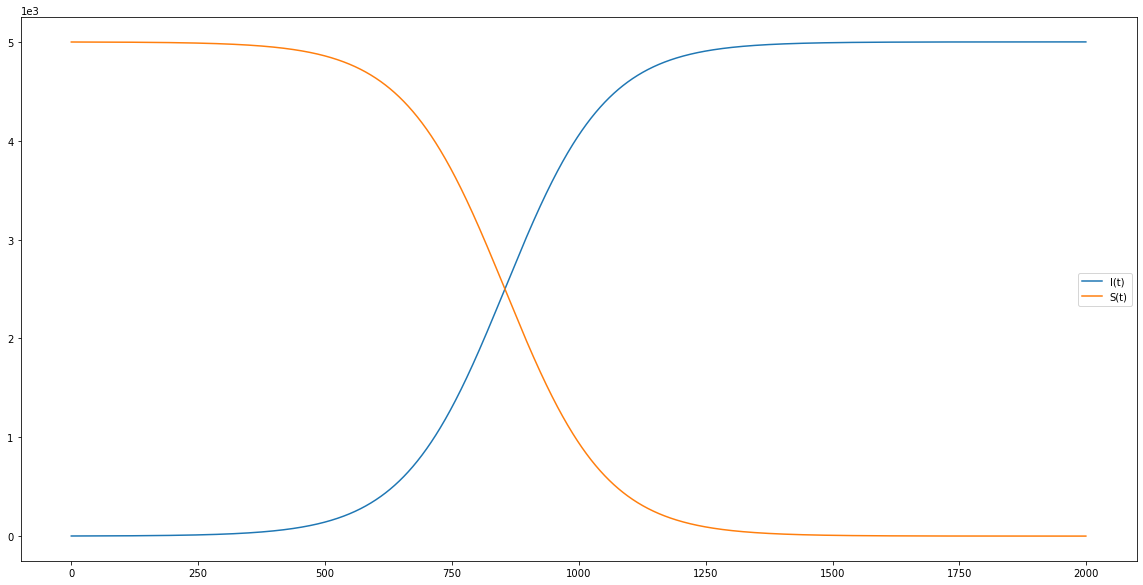

In [6]:
import matplotlib.pyplot as plt

N = 5000 # S + I = N
S = N - 1
I = 1
beta = 0.01
iterations = 2000

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

def infection(S, I, N, iterations):
    
    for i in range(iterations):
        S, I = S - beta * ((S * I) / N), I + beta * ((S * I) / N)
        S_comp.append(S)
        I_comp.append(I)

infection(S, I, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')

plt.legend(handles=[I_line, S_line])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

### SIR model

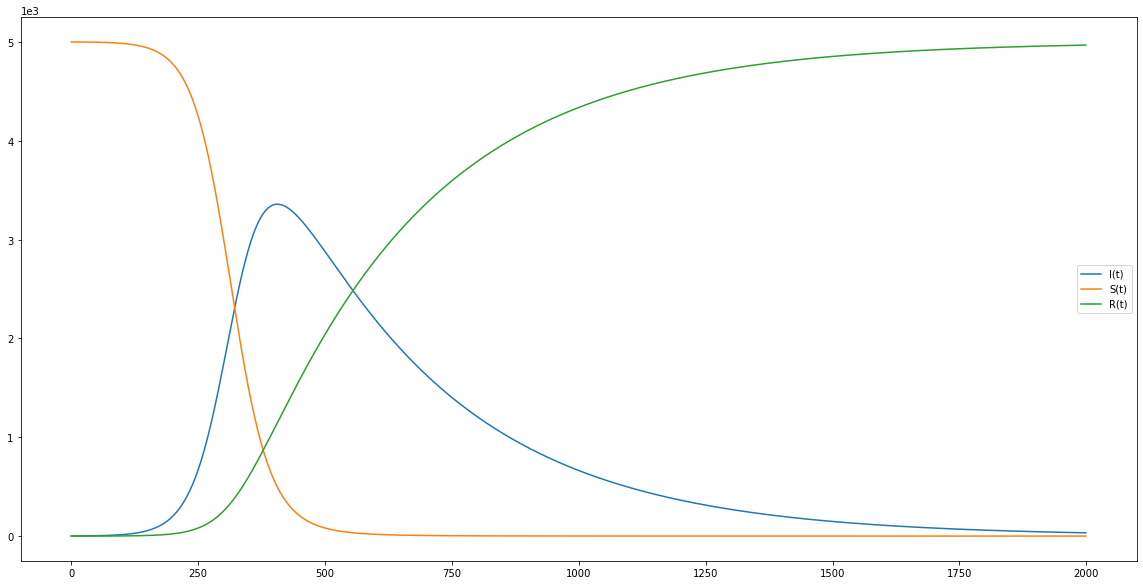

In [7]:
import matplotlib.pyplot as plt

N = 5000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.03
gamma = 0.003
iterations = 2000

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = []

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')

plt.legend(handles=[I_line, S_line, R_line])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

## Contaminations au fil du temps : SIR

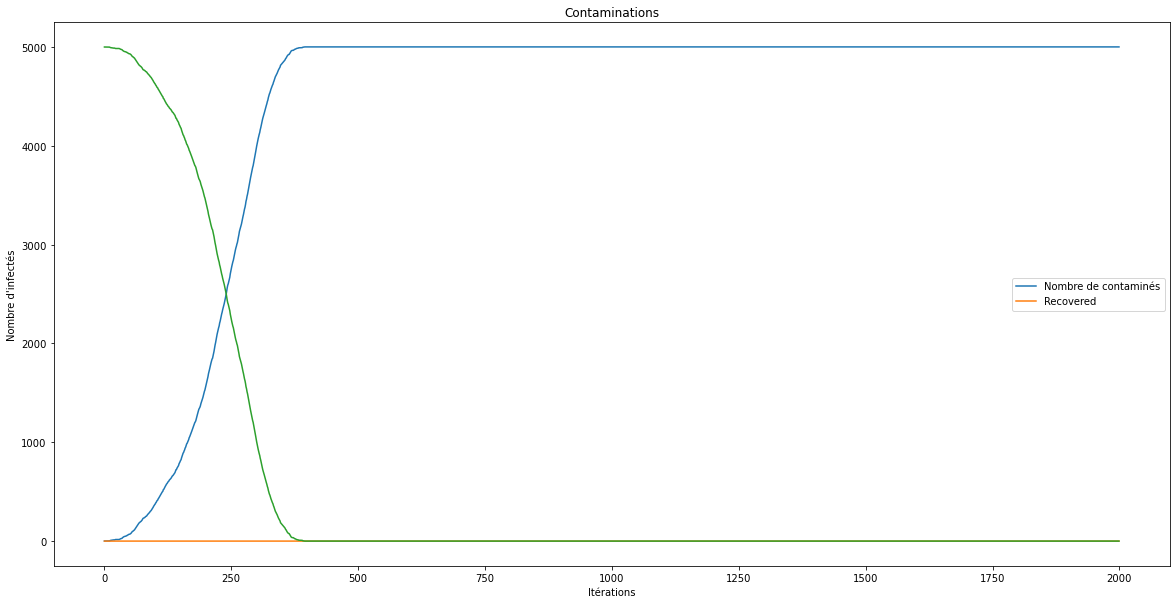

In [8]:
nombre_individus = 5000

contamine = pd.read_csv(path + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

ax = contamine.plot(figsize=(20, 10))
recovered.plot(ax = ax)
nombre_individus_data = nombre_individus - contamine
nombre_individus_data = nombre_individus_data['Nombre de contaminés'].subtract(recovered['Recovered'])


nombre_individus_data.plot(ax = ax)

plt.title("Contaminations")
plt.xlabel("Itérations")
plt.ylabel("Nombre d'infectés")
plt.show

plt.savefig('contaminations.png', dpi=300, bbox_inches='tight')


## Nombre de fois que les individus ont été contaminés

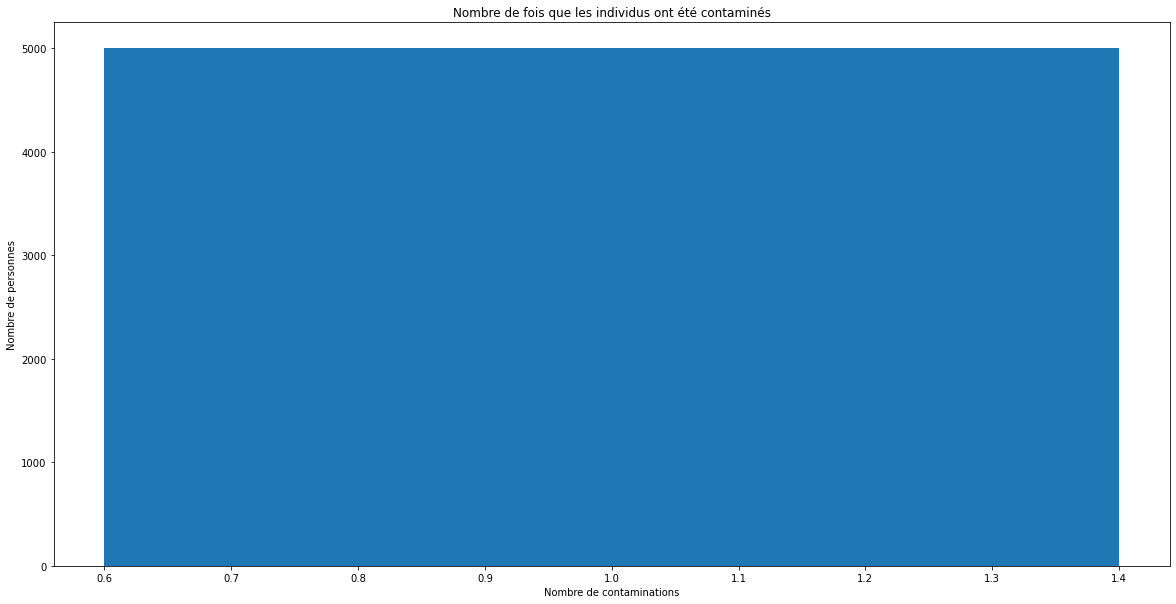

In [9]:
contamine = pd.read_csv(path + "/data_csv/m_nombre_de_fois_contamine_file.csv", dtype=int)
contamine_data = pd.DataFrame(contamine)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Nombre de fois que les individus ont été contaminés")
ax.set_xlabel('Nombre de contaminations')
ax.set_ylabel('Nombre de personnes')


somme_fois_contamine = contamine_data['Individus'].value_counts(ascending = True).values.tolist()
nb_fois_contamine = contamine_data['Individus'].value_counts(ascending = True).index.tolist()

for i in nb_fois_contamine:
    i = str(i)

taille = len(somme_fois_contamine)

ax.bar(nb_fois_contamine,somme_fois_contamine)
plt.savefig('nb_times_contaminations.png', dpi=300, bbox_inches='tight')
plt.show()


## Nombre de pathogènes différents au fil du temps

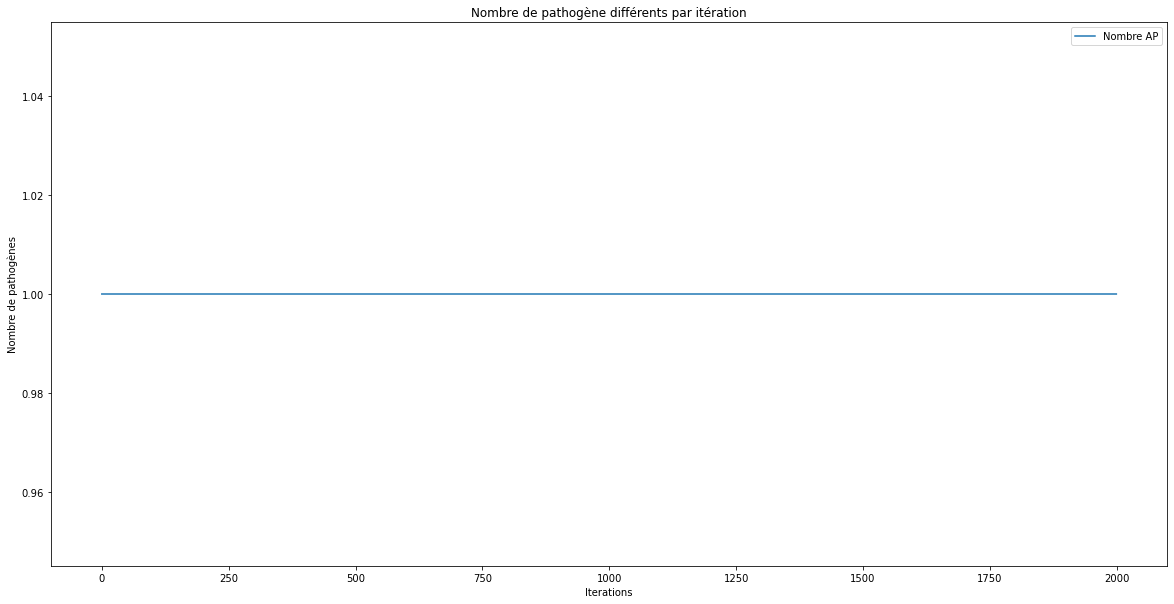

In [10]:
genome_AP = pd.read_csv(path + "/data_csv/m_nombre_AP.csv")
genome_AP_data = pd.DataFrame(genome_AP)

plt.cla
genome_AP_data.plot(figsize=(20, 10))
plt.title("Nombre de pathogène différents par itération")
plt.xlabel('Iterations')
plt.ylabel('Nombre de pathogènes')
plt.savefig('nb_AP.png', dpi=300, bbox_inches='tight')
plt.show()
